In [1]:
import pandas as pd
import pickle
import networkx as nx
import numpy as np
from tqdm import tqdm_notebook
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage  
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter
from itertools import combinations
%matplotlib inline
from sklearn.preprocessing import normalize
import os
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
import random

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
import spacy
from spacy import displacy


PATH_TO_RUS_LANG_MODEL = "C:/Users/User/Documents/spacy-ru-master/ru2/"
ru_nlp = spacy.load(PATH_TO_RUS_LANG_MODEL) # Загрузим языковую модель
#ru_nlp = spacy.load('en_core_web_sm')

#current_language = 'en'
current_language = 'ru'

In [3]:
graphs_and_sentences = pickle.load(open('conll_parsed_ru_language', 'rb'))

In [4]:
print('We have {} sentences (graphs)'.format(len(graphs_and_sentences)))

We have 61889 sentences (graphs)


# WL Kernel with dependencies

In [5]:
html_name = 'WL_Kernel_with_dependencies_{}_clusters_{}.html'
name = 'WL Kernel with dependencies'

path_to_d2v_model = 'FULL_wl_kernel_2_with_dependency_ru.model'
path_to_csv_with_embeddings = 'C:\\Users\\User\\AuthorStyle\\CoNLL\\EXPERIMENTAL_EMBEDDING\\wl_kernel_2_with_dependency_vectors_dim_50_ru.csv'

model = pickle.load(open(path_to_d2v_model, 'rb'))
print(str(model))
df = pd.read_csv(path_to_csv_with_embeddings)
print('graph2vec shape: {}'.format(df.shape))
df.head()

(<dep_tree_embedding.WLExtractor object at 0x000001BB9497EF60>, <dep_tree_embedding.DepTreeEmbedding object at 0x000001BBFFFE9588>)
graph2vec shape: (61889, 51)


,Type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49
0,0,0.522512,0.257050,-0.145618,-0.398585,-0.265484,-0.143339,-0.218729,0.085656,0.369437,...,-0.002601,0.076505,-0.656494,-0.241970,0.073937,0.180409,-0.234990,0.168578,0.168087,-0.028329
1,1,0.125956,-0.113120,0.127866,-0.243473,-0.246138,-0.521300,-0.748871,0.055020,0.617417,...,-0.063075,-0.099647,-0.240150,0.063227,-0.303290,-0.113590,-0.244465,0.427193,-0.419203,0.152318
2,2,-0.232250,0.061611,0.147097,-0.102518,-0.194391,0.187656,0.050501,-0.135576,-0.077290,...,-0.073048,-0.367363,0.149369,-0.026017,0.453523,-0.281772,-0.091005,0.264164,-0.156693,0.045124
3,3,-0.973664,-0.103102,-0.763641,-0.235664,-0.247679,-0.155536,-0.031103,0.375137,0.245736,...,0.255985,-0.509347,0.002029,0.039524,0.026820,-0.065614,0.203438,-0.094295,-0.093370,-0.432650
4,4,-0.479133,0.019136,-0.397532,0.206036,-0.124943,0.123089,-0.273900,-0.393271,0.112122,...,0.244408,0.191309,0.118795,-0.093861,-0.215216,0.057014,-0.366756,-0.027513,-0.155265,-0.513476


In [6]:
numbers_type = df.Type.values
X = df.drop('Type', axis=1).values

print('Shape of X : {}'.format(X.shape))
X2 = normalize(X)


Shape of X : (61889, 50)


Silhouette Score
Silhouette Coefficient for 2 clusters: 0.06626236603558787
Silhouette Coefficient for 3 clusters: 0.05621421636719863
Silhouette Coefficient for 4 clusters: 0.052220893213846646
Silhouette Coefficient for 5 clusters: 0.052428196024281226
Silhouette Coefficient for 6 clusters: 0.04684816618689872
Silhouette Coefficient for 7 clusters: 0.04208517060879941
Silhouette Coefficient for 8 clusters: 0.03866158253551506
Silhouette Coefficient for 9 clusters: 0.0351843692432015
Silhouette Coefficient for 10 clusters: 0.035133030356791224
Silhouette Coefficient for 11 clusters: 0.03309440143624586
Silhouette Coefficient for 12 clusters: 0.03275982442548702
Silhouette Coefficient for 13 clusters: 0.03118080784007762
Silhouette Coefficient for 14 clusters: 0.031487807317844466
Silhouette Coefficient for 15 clusters: 0.031299282870292267
Silhouette Coefficient for 16 clusters: 0.029670215663010386
Silhouette Coefficient for 17 clusters: 0.029256908776393788
Silhouette Coefficient fo

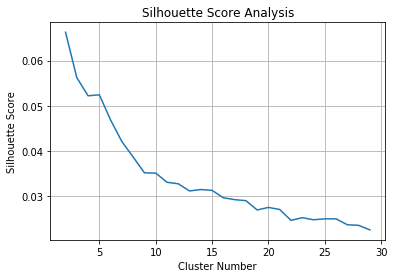

In [7]:
print("Silhouette Score")
silhouette_scores_list = []

for cluster_number in range(2,30):
    kMInstance = KMeans(n_clusters=cluster_number, init='k-means++', n_init=5)
    kMInstance.fit(X2)
    current_silhouette_score = silhouette_score(X2, kMInstance.labels_, metric='euclidean', sample_size=10000)
    silhouette_scores_list.append((cluster_number, current_silhouette_score))
    print("Silhouette Coefficient for {} clusters: {}".format(cluster_number, current_silhouette_score))

plt.plot(list(map(lambda x : x[0], silhouette_scores_list)),
       list(map(lambda x : x[1], silhouette_scores_list)))

plt.xlabel('Cluster Number')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.grid(True)
plt.show()

In [8]:
OPTIMAL_CLUSTER_NUMBER = 18

In [9]:
kMInstance = KMeans(n_clusters=OPTIMAL_CLUSTER_NUMBER,
                    init='k-means++', 
                    n_init=10)
clusters = kMInstance.fit_predict(X2)

### Distribution

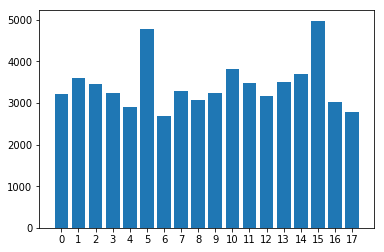

In [10]:
labels, counts = np.unique(clusters, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold
from collections import defaultdict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')


In [26]:
dict_of_classes = defaultdict(set)
doc2vec_instance = model[1].model
htmlReport = '''<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8" />
<title>Embedded SVG</title>
</head>
<body>
'''
htmlReport += '''<h1>{}</h1>'''.format(name)
for cluster_number in np.unique(clusters):
    
    htmlReport += '\n<h2>Cluster #{}</h2>'.format(cluster_number)
    centroid_of_current_cluster = kMInstance.cluster_centers_[cluster_number]
    list_of_the_most_similar_vectors = doc2vec_instance.docvecs.most_similar([centroid_of_current_cluster], topn=12)
    
    for one_of_similar_vector in list_of_the_most_similar_vectors:
        name = one_of_similar_vector[0]
        position = int(name.split('_')[-1])
        if clusters[position] != cluster_number:
            continue
        sent = graphs_and_sentences[position]['sentence']
        htmlReport += '<p>Sentence (position = {}): {}</p>'.format(position, sent)
        doc = ru_nlp(sent)
        svg = displacy.render(doc, style='dep', options={'collapse_punct' : False, 
                                                         #'compact' : True
                                                        })

        htmlReport += svg
        htmlReport += "<hr>"

htmlReport += """</body>
</html>"""

htmlReportFile = open(
    os.path.join('Reports', html_name.format(OPTIMAL_CLUSTER_NUMBER, current_language)),
    'w', encoding='utf-8')
htmlReportFile.write(htmlReport)
htmlReportFile.close()

# WL Kernel without dependencies

In [27]:
html_name = 'WL_Kernel_without_dependencies_{}_clusters_{}.html'
name = 'WL Kernel without dependencies'

path_to_d2v_model = 'FULL_wl_kernel_2_without_dependency_ru.model'
path_to_csv_with_embeddings = 'C:\\Users\\User\\AuthorStyle\\CoNLL\\EXPERIMENTAL_EMBEDDING\\wl_kernel_2_without_dependency_vectors_dim_50_ru.csv'



model = pickle.load(open(path_to_d2v_model, 'rb'))
print(str(model))
df = pd.read_csv(path_to_csv_with_embeddings)
print('graph2vec shape: {}'.format(df.shape))
df.head()



(<dep_tree_embedding.WLExtractor object at 0x000001BC1D4F80F0>, <dep_tree_embedding.DepTreeEmbedding object at 0x000001BC1D4F8160>)
graph2vec shape: (61889, 51)


,Type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49
0,0,0.037602,0.806286,0.436710,-0.176122,-0.381618,0.516263,-0.672581,-0.001295,0.240555,...,0.142585,-0.512157,0.035070,-0.109651,-0.074435,-0.179311,0.080432,0.114086,-0.271878,0.230591
1,1,0.116713,0.282714,0.067951,0.216779,-0.418636,-0.155188,-0.351700,0.057558,0.346293,...,-0.430395,-0.572989,0.229403,-0.207340,0.391145,0.214434,-0.193132,-0.520221,-0.307543,-0.117942
2,2,0.404255,0.193987,0.673277,0.657761,-0.410019,0.307626,0.194749,0.013635,-0.327872,...,-0.744466,-0.260160,-0.026546,-0.145218,-0.173361,0.391810,-0.310338,-0.143581,0.073716,0.091555
3,3,0.095250,0.349020,-0.175190,-0.056710,-0.256382,0.675808,0.095214,-0.031617,0.001755,...,-0.111078,0.117545,0.113698,0.400416,0.047402,0.752158,-0.328100,0.143358,0.272722,0.457913
4,4,0.402822,0.008184,0.262642,-0.142328,0.302339,0.061752,-0.635233,0.259765,0.263220,...,-0.736899,-0.119125,-0.370502,0.131716,0.361468,0.357344,-1.030990,-0.075151,-0.222653,0.012978


Shape of X : (61889, 50)
Silhouette Score
Silhouette Coefficient for 2 clusters: 0.06275651200881875
Silhouette Coefficient for 3 clusters: 0.057198303661223034
Silhouette Coefficient for 4 clusters: 0.04834744796184395
Silhouette Coefficient for 5 clusters: 0.046920866552012434
Silhouette Coefficient for 6 clusters: 0.04006494793832707
Silhouette Coefficient for 7 clusters: 0.036172586580014834
Silhouette Coefficient for 8 clusters: 0.03696136423212062
Silhouette Coefficient for 9 clusters: 0.034697963038252566
Silhouette Coefficient for 10 clusters: 0.03494978620677491
Silhouette Coefficient for 11 clusters: 0.03439847620616444
Silhouette Coefficient for 12 clusters: 0.032084609696888464
Silhouette Coefficient for 13 clusters: 0.03269747727954126
Silhouette Coefficient for 14 clusters: 0.02859657323918832
Silhouette Coefficient for 15 clusters: 0.029387647246373463
Silhouette Coefficient for 16 clusters: 0.026008338577191016
Silhouette Coefficient for 17 clusters: 0.02666563957405888

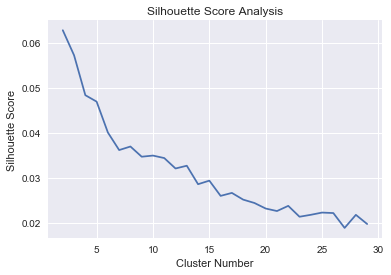

In [28]:
numbers_type = df.Type.values
X = df.drop('Type', axis=1).values

print('Shape of X : {}'.format(X.shape))
X2 = normalize(X)


print("Silhouette Score")
silhouette_scores_list = []

for cluster_number in range(2,30):
    kMInstance = KMeans(n_clusters=cluster_number, init='k-means++', n_init=5)
    kMInstance.fit(X2)
    current_silhouette_score = silhouette_score(X2, kMInstance.labels_, metric='euclidean', sample_size=10000)
    silhouette_scores_list.append((cluster_number, current_silhouette_score))
    print("Silhouette Coefficient for {} clusters: {}".format(cluster_number, current_silhouette_score))

plt.plot(list(map(lambda x : x[0], silhouette_scores_list)),
       list(map(lambda x : x[1], silhouette_scores_list)))

plt.xlabel('Cluster Number')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.grid(True)
plt.show()


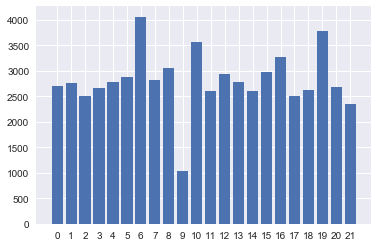

In [29]:
OPTIMAL_CLUSTER_NUMBER = 22

kMInstance = KMeans(n_clusters=OPTIMAL_CLUSTER_NUMBER,
                    init='k-means++', 
                    n_init=10)
clusters = kMInstance.fit_predict(X2)

### Distribution

labels, counts = np.unique(clusters, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [42]:
doc2vec_instance = model[1].model
dict_of_classes = defaultdict(set)

htmlReport = '''<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8" />
<title>Embedded SVG</title>
</head>
<body>
'''
htmlReport += '''<h1>{}</h1>'''.format(name)
for cluster_number in np.unique(clusters):
    
    htmlReport += '\n<h2>Cluster #{}</h2>'.format(cluster_number)
    centroid_of_current_cluster = kMInstance.cluster_centers_[cluster_number]
    list_of_the_most_similar_vectors = doc2vec_instance.docvecs.most_similar([centroid_of_current_cluster], topn=12)
    
    for one_of_similar_vector in list_of_the_most_similar_vectors:
        name = one_of_similar_vector[0]
        position = int(name.split('_')[-1])
        if clusters[position] != cluster_number:
            continue
        sent = graphs_and_sentences[position]['sentence']
        htmlReport += '<p>Sentence (position = {}): {}</p>'.format(position, sent)
        doc = ru_nlp(sent)
        svg = displacy.render(doc, style='dep', options={'collapse_punct' : False, 
                                                         #'compact' : True
                                                        })

        htmlReport += svg
        htmlReport += "<hr>"

htmlReport += """</body>
</html>"""

htmlReportFile = open(
    os.path.join('Reports', html_name.format(OPTIMAL_CLUSTER_NUMBER, current_language)),
    'w', encoding='utf-8')
htmlReportFile.write(htmlReport)
htmlReportFile.close()

# Simple paths

In [43]:
html_name = 'Simple_Path_Kernel_{}_clusters_{}.html'
name = 'Simple Path Kernel'

path_to_d2v_model = 'FULL_path_extractor_ru.model'



model = pickle.load(open(path_to_d2v_model, 'rb'))
print(str(model))
df = pd.read_csv(path_to_csv_with_embeddings)
print('graph2vec shape: {}'.format(df.shape))
df.head()

(<dep_tree_embedding.SimplePathExtractor object at 0x000001BC1C67A898>, <dep_tree_embedding.DepTreeEmbedding object at 0x000001BC586C5978>)
graph2vec shape: (61889, 51)


,Type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49
0,0,-0.895372,0.249476,1.008298,-0.072381,-0.284903,0.938598,-0.392589,-0.272816,-0.225930,...,-1.288795,0.480338,-0.028810,-0.963966,-0.911812,0.275412,-0.289885,0.164613,-0.830212,-0.027437
1,1,-0.160846,-0.062222,0.327905,0.483652,-0.114403,0.417911,0.795983,-0.573350,0.699927,...,-1.614480,-0.662076,-1.203910,1.111488,-0.105999,-0.418944,-0.695406,0.066845,-1.163377,1.081137
2,2,1.186694,0.717619,0.761737,-0.215127,-0.604000,-0.520503,-1.285256,-0.176546,0.943991,...,-0.568837,-0.058513,-0.405351,-0.491381,-1.724948,-0.090375,0.158659,0.302037,-0.317165,0.261320
3,3,-0.124294,0.613017,0.830139,-0.536549,0.216531,0.517900,-0.735545,0.356909,0.832599,...,-0.667444,0.430519,-0.874306,0.081627,-1.127759,0.008527,0.252356,0.765013,-1.084654,0.434188
4,4,0.056991,0.660093,0.556052,-0.614171,-0.299939,-0.464508,-0.536911,1.452551,1.347900,...,-1.008559,-0.143607,0.017452,1.143364,-0.113435,-0.470418,-0.946289,-0.851114,-2.319543,0.072105


In [44]:
numbers_type = df.Type.values
X = df.drop('Type', axis=1).values

print('Shape of X : {}'.format(X.shape))
X2 = normalize(X)


Shape of X : (61889, 50)


Silhouette Score
Silhouette Coefficient for 2 clusters: 0.08018827210503235
Silhouette Coefficient for 3 clusters: 0.06904636909368604
Silhouette Coefficient for 4 clusters: 0.058286077882283335
Silhouette Coefficient for 5 clusters: 0.059138203835225146
Silhouette Coefficient for 6 clusters: 0.06420548707438366
Silhouette Coefficient for 7 clusters: 0.0632518581256645
Silhouette Coefficient for 8 clusters: 0.064046376490147
Silhouette Coefficient for 9 clusters: 0.06828183319425754
Silhouette Coefficient for 10 clusters: 0.06513963213668496
Silhouette Coefficient for 11 clusters: 0.06977546283300053
Silhouette Coefficient for 12 clusters: 0.06250601013175677
Silhouette Coefficient for 13 clusters: 0.06305456347730835
Silhouette Coefficient for 14 clusters: 0.05039519669286394
Silhouette Coefficient for 15 clusters: 0.06020714762948828
Silhouette Coefficient for 16 clusters: 0.0599642710020114
Silhouette Coefficient for 17 clusters: 0.05568243164780963
Silhouette Coefficient for 18 clu

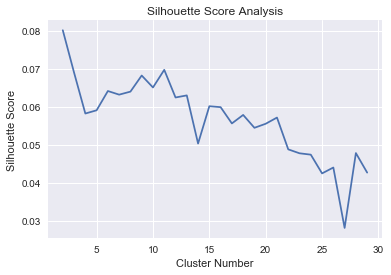

In [45]:
print("Silhouette Score")
silhouette_scores_list = []

for cluster_number in range(2,30):
    kMInstance = KMeans(n_clusters=cluster_number, init='k-means++', n_init=5)
    kMInstance.fit(X2)
    current_silhouette_score = silhouette_score(X2, kMInstance.labels_, metric='euclidean', sample_size=10000)
    silhouette_scores_list.append((cluster_number, current_silhouette_score))
    print("Silhouette Coefficient for {} clusters: {}".format(cluster_number, current_silhouette_score))

plt.plot(list(map(lambda x : x[0], silhouette_scores_list)),
       list(map(lambda x : x[1], silhouette_scores_list)))

plt.xlabel('Cluster Number')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.grid(True)
plt.show()

In [72]:
OPTIMAL_CLUSTER_NUMBER = 21

In [73]:
kMInstance = KMeans(n_clusters=OPTIMAL_CLUSTER_NUMBER,
                    init='k-means++', 
                    n_init=10)
clusters = kMInstance.fit_predict(X2)

### Distribution

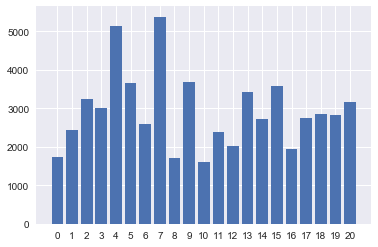

In [74]:
labels, counts = np.unique(clusters, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [87]:
htmlReport = '''<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8" />
<title>Embedded SVG</title>
</head>
<body>
'''
htmlReport += '''<h1>{}</h1>'''.format(name)
for cluster_number in np.unique(clusters):
    
    htmlReport += '\n<h2>Cluster #{}</h2>'.format(cluster_number)
    centroid_of_current_cluster = kMInstance.cluster_centers_[cluster_number]
    list_of_the_most_similar_vectors = model[1].model.docvecs.most_similar([centroid_of_current_cluster], topn=10)
    
    for one_of_similar_vector in list_of_the_most_similar_vectors:
        name = one_of_similar_vector[0]
        position = int(name.split('_')[-1])
        if clusters[position] != cluster_number:
            continue
        sent = graphs_and_sentences[position]['sentence']
        htmlReport += '<p>Sentence (position = {}): {}</p>'.format(position, sent)
        doc = ru_nlp(sent)
        svg = displacy.render(doc, style='dep', options={'collapse_punct' : False, 
                                                         #'compact' : True
                                                        })
        htmlReport += svg
        htmlReport += "<hr>"

htmlReport += """</body>
</html>"""

htmlReportFile = open(
    os.path.join('Reports', html_name.format(OPTIMAL_CLUSTER_NUMBER, current_language)),
    'w', encoding='utf-8')
htmlReportFile.write(htmlReport)
htmlReportFile.close()

# Contracted Nodes Kernel with dependencies


In [88]:
html_name = 'Contracted_Kernel_with_dependencies_{}_clusters_{}.html'
name = 'Contracted Kernel with dependencies'

path_to_d2v_model = 'FULL_contracted_with_dependency_ru.model'
path_to_csv_with_embeddings = 'C:\\Users\\User\\AuthorStyle\\CoNLL\\EXPERIMENTAL_EMBEDDING\\contracted_with_dependency_vectors_dim_50_ru.csv'




model = pickle.load(open(path_to_d2v_model, 'rb'))
print(str(model))
df = pd.read_csv(path_to_csv_with_embeddings)
print('graph2vec shape: {}'.format(df.shape))
df.head()



(<dep_tree_embedding.ContractedFeatureExtractor object at 0x000001BC5F783CF8>, <dep_tree_embedding.DepTreeEmbedding object at 0x000001BC113C5630>)
graph2vec shape: (61889, 51)


,Type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49
0,0,-0.103616,0.454216,0.661439,0.080668,-0.487843,-0.043934,-0.135324,0.305138,-0.378445,...,-0.009001,0.076024,-0.391137,0.316226,0.169799,0.454038,-0.366445,-0.065790,-0.441295,-0.076138
1,1,0.020970,0.094200,0.447375,0.336880,-0.163178,-0.178024,-0.335563,0.061683,-0.201310,...,0.175824,0.031507,0.245940,0.440801,0.516355,0.385501,-0.341830,0.156132,-0.269613,-0.021296
2,2,0.328347,0.130693,0.786791,0.235939,-0.005866,-0.139739,-0.235796,-0.017536,-0.101509,...,-0.078379,-0.104432,0.183406,0.398201,-0.252036,0.673237,-0.660485,0.005587,-0.216375,0.474494
3,3,0.095271,0.061687,0.079709,0.126707,-0.417104,-0.061243,-0.413393,0.266885,-0.156141,...,-0.178429,-0.127240,0.352781,-0.249899,0.094378,0.002144,-0.755316,-0.042940,-0.135242,0.391758
4,4,0.195974,0.507407,0.262294,0.085478,0.361244,-0.253245,0.069682,0.362219,0.177376,...,-0.165069,-0.205077,0.322228,-0.017558,0.252894,0.204401,-0.880028,-0.228738,0.229081,0.115928


Shape of X : (61889, 50)
Silhouette Score
Silhouette Coefficient for 2 clusters: 0.05573778165828407
Silhouette Coefficient for 3 clusters: 0.04860999899717607
Silhouette Coefficient for 4 clusters: 0.04208575075198232
Silhouette Coefficient for 5 clusters: 0.04106008963908093
Silhouette Coefficient for 6 clusters: 0.034009456579197996
Silhouette Coefficient for 7 clusters: 0.028279652557831582
Silhouette Coefficient for 8 clusters: 0.02653349921429062
Silhouette Coefficient for 9 clusters: 0.02353020209622561
Silhouette Coefficient for 10 clusters: 0.023610633673880634
Silhouette Coefficient for 11 clusters: 0.02544175009241476
Silhouette Coefficient for 12 clusters: 0.018728002595509753
Silhouette Coefficient for 13 clusters: 0.02333289386838351
Silhouette Coefficient for 14 clusters: 0.024088098392952825
Silhouette Coefficient for 15 clusters: 0.02342401398266627
Silhouette Coefficient for 16 clusters: 0.020026595218170497
Silhouette Coefficient for 17 clusters: 0.01966489370737512


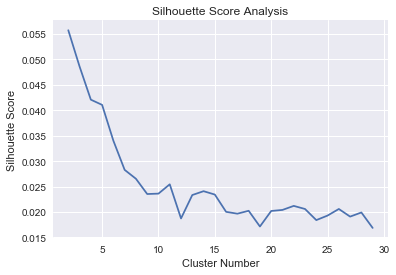

In [89]:
numbers_type = df.Type.values
X = df.drop('Type', axis=1).values

print('Shape of X : {}'.format(X.shape))
X2 = normalize(X)


print("Silhouette Score")
silhouette_scores_list = []

for cluster_number in range(2,30):
    kMInstance = KMeans(n_clusters=cluster_number, init='k-means++', n_init=5)
    kMInstance.fit(X2)
    current_silhouette_score = silhouette_score(X2, kMInstance.labels_, metric='euclidean', sample_size=10000)
    silhouette_scores_list.append((cluster_number, current_silhouette_score))
    print("Silhouette Coefficient for {} clusters: {}".format(cluster_number, current_silhouette_score))

plt.plot(list(map(lambda x : x[0], silhouette_scores_list)),
       list(map(lambda x : x[1], silhouette_scores_list)))

plt.xlabel('Cluster Number')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.grid(True)
plt.show()


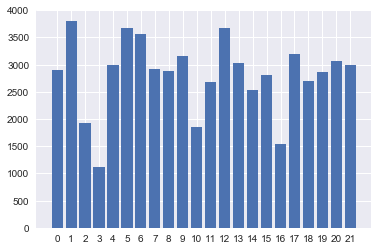

In [90]:
OPTIMAL_CLUSTER_NUMBER = 22

kMInstance = KMeans(n_clusters=OPTIMAL_CLUSTER_NUMBER,
                    init='k-means++', 
                    n_init=10)
clusters = kMInstance.fit_predict(X2)

### Distribution

labels, counts = np.unique(clusters, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [102]:
htmlReport = '''<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8" />
<title>Embedded SVG</title>
</head>
<body>
'''
htmlReport += '''<h1>{}</h1>'''.format(name)
for cluster_number in np.unique(clusters):
    
    htmlReport += '\n<h2>Cluster #{}</h2>'.format(cluster_number)
    centroid_of_current_cluster = kMInstance.cluster_centers_[cluster_number]
    list_of_the_most_similar_vectors = model[1].model.docvecs.most_similar([centroid_of_current_cluster], topn=10)
    
    for one_of_similar_vector in list_of_the_most_similar_vectors:
        name = one_of_similar_vector[0]
        position = int(name.split('_')[-1])
        if clusters[position] != cluster_number:
            continue
        sent = graphs_and_sentences[position]['sentence']
        htmlReport += '<p>Sentence (position = {}): {}</p>'.format(position, sent)
        doc = ru_nlp(sent)
        svg = displacy.render(doc, style='dep', options={'collapse_punct' : False, 
                                                         #'compact' : True
                                                        })

        htmlReport += svg
        htmlReport += "<hr>"

htmlReport += """</body>
</html>"""

htmlReportFile = open(
    os.path.join('Reports', html_name.format(OPTIMAL_CLUSTER_NUMBER, current_language)),
    'w', encoding='utf-8')
htmlReportFile.write(htmlReport)
htmlReportFile.close()

# Contracted Nodes Kernel without dependencies


In [103]:
# WL Kernel without dependencies

html_name = 'Contracted_Kernel_without_dependencies_{}_clusters_{}.html'
name = 'Contracted Kernel without dependencies'

path_to_d2v_model = 'FULL_contracted_without_dependency_ru.model'
path_to_csv_with_embeddings = 'C://Users//User//AuthorStyle//CoNLL//EXPERIMENTAL_EMBEDDING/contracted_without_dependency_vectors_dim_50_ru.csv'


model = pickle.load(open(path_to_d2v_model, 'rb'))
print(str(model))
df = pd.read_csv(path_to_csv_with_embeddings)
print('graph2vec shape: {}'.format(df.shape))
display(df.head())



numbers_type = df.Type.values
X = df.drop('Type', axis=1).values

print('Shape of X : {}'.format(X.shape))
X2 = normalize(X)





(<dep_tree_embedding.ContractedFeatureExtractor object at 0x000001BC34E67208>, <dep_tree_embedding.DepTreeEmbedding object at 0x000001BC136FC128>)
graph2vec shape: (61889, 51)


,Type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49
0,0,-0.080374,0.520760,0.309990,0.039027,-0.527354,0.159694,-0.266302,0.250471,-0.305119,...,0.082623,0.224690,-0.270106,0.071185,-0.008845,0.278201,-0.458851,-0.325947,-0.579898,-0.056903
1,1,0.242846,-0.088717,0.197954,-0.044248,-0.234970,0.022015,-0.100390,0.072054,0.022311,...,0.005621,-0.111998,0.073503,-0.280996,0.453760,0.151140,-0.370162,-0.120951,-0.488342,0.229263
2,2,0.558147,-0.052629,0.694048,0.139801,-0.031083,-0.244531,-0.360659,-0.096737,0.161229,...,-0.488476,-0.137342,-0.110738,-0.008219,-0.155078,0.273542,-0.833630,0.544772,0.161784,0.145499
3,3,0.085733,0.043934,-0.138394,0.317128,-0.305726,-0.199068,-0.537115,0.433412,0.282479,...,-0.345268,-0.008013,0.187837,-0.426704,0.301055,0.207015,-0.480886,-0.224751,0.120544,0.642232
4,4,0.037600,0.597004,0.147141,0.090706,-0.056560,-0.082539,0.178335,0.306295,0.321238,...,-0.258225,-0.049790,0.308568,0.154916,0.634599,0.150529,-1.033028,-0.297857,0.186070,0.281345


Shape of X : (61889, 50)


Silhouette Score
Silhouette Coefficient for 2 clusters: 0.0547618455675718
Silhouette Coefficient for 3 clusters: 0.04623299106340653
Silhouette Coefficient for 4 clusters: 0.04518981243117862
Silhouette Coefficient for 5 clusters: 0.04097981854382721
Silhouette Coefficient for 6 clusters: 0.03435878630386645
Silhouette Coefficient for 7 clusters: 0.02864221193868285
Silhouette Coefficient for 8 clusters: 0.027440168969618043
Silhouette Coefficient for 9 clusters: 0.025621676358642695
Silhouette Coefficient for 10 clusters: 0.024671333433304774
Silhouette Coefficient for 11 clusters: 0.02541947965578208
Silhouette Coefficient for 12 clusters: 0.026763437980144245
Silhouette Coefficient for 13 clusters: 0.024368436139619438
Silhouette Coefficient for 14 clusters: 0.02376983211744339
Silhouette Coefficient for 15 clusters: 0.023353437589384473
Silhouette Coefficient for 16 clusters: 0.022493728423715775
Silhouette Coefficient for 17 clusters: 0.0188517285842084
Silhouette Coefficient for

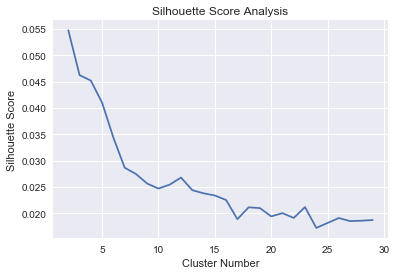

In [104]:
print("Silhouette Score")
silhouette_scores_list = []

for cluster_number in range(2,30):
    kMInstance = KMeans(n_clusters=cluster_number, init='k-means++', n_init=5)
    kMInstance.fit(X2)
    current_silhouette_score = silhouette_score(X2, kMInstance.labels_, metric='euclidean', sample_size=10000)
    silhouette_scores_list.append((cluster_number, current_silhouette_score))
    print("Silhouette Coefficient for {} clusters: {}".format(cluster_number, current_silhouette_score))

plt.plot(list(map(lambda x : x[0], silhouette_scores_list)),
       list(map(lambda x : x[1], silhouette_scores_list)))

plt.xlabel('Cluster Number')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.grid(True)
plt.show()




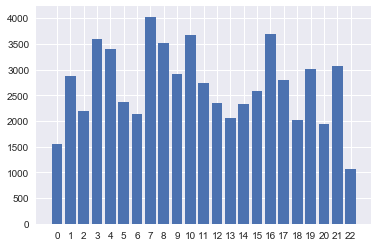

In [128]:
OPTIMAL_CLUSTER_NUMBER = 23

kMInstance = KMeans(n_clusters=OPTIMAL_CLUSTER_NUMBER,
                    init='k-means++', 
                    n_init=10)
clusters = kMInstance.fit_predict(X2)

### Distribution

labels, counts = np.unique(clusters, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()


In [141]:
htmlReport = '''<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8" />
<title>Embedded SVG</title>
</head>
<body>
'''
htmlReport += '''<h1>{}</h1>'''.format(name)
for cluster_number in np.unique(clusters):
    
    htmlReport += '\n<h2>Cluster #{}</h2>'.format(cluster_number)
    centroid_of_current_cluster = kMInstance.cluster_centers_[cluster_number]
    list_of_the_most_similar_vectors = model[1].model.docvecs.most_similar([centroid_of_current_cluster], topn=10)
    
    for one_of_similar_vector in list_of_the_most_similar_vectors:
        name = one_of_similar_vector[0]
        position = int(name.split('_')[-1])
        if clusters[position] != cluster_number:
            continue
        sent = graphs_and_sentences[position]['sentence']
        htmlReport += '<p>Sentence (position = {}): {}</p>'.format(position, sent)
        doc = ru_nlp(sent)
        svg = displacy.render(doc, style='dep')
        htmlReport += svg
        htmlReport += "<hr>"

htmlReport += """</body>
</html>"""

htmlReportFile = open(
    os.path.join('Reports', html_name.format(OPTIMAL_CLUSTER_NUMBER, current_language)),
    'w', encoding='utf-8')
htmlReportFile.write(htmlReport)
htmlReportFile.close()

In [37]:
model.vector_size

50